In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from memote import ReportConfiguration
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

In [3]:
%matplotlib inline

## Extract

In [4]:
bucket = []
for filename, collection in [
    ("data/bigg.csv", "bigg"),
    ("data/uminho.csv", "uminho"),
    ("data/mmodel.csv", "ebrahim"),
    ("data/agora.csv", "agora"),
    ("data/embl_gems.csv", "embl"),
    ("data/path2models.csv", "path"),
    ("data/seed.csv", "seed"),
]:
    tmp = pd.read_csv(filename)
    tmp["collection"] = collection
    bucket.append(tmp)
df = pd.concat(bucket, ignore_index=True)

In [5]:
df.shape

(1355428, 7)

In [6]:
df.head()

,test,title,section,metric,numeric,model,collection
0,test_absolute_extreme_coefficient_ratio,Ratio Min/Max Non-Zero Coefficients,matrix,0.0,NaN,iE2348C_1286,bigg
1,test_biomass_consistency,Biomass Consistency,test_biomass,0.0,0.9996577560637441,iE2348C_1286,bigg
2,test_biomass_consistency,Biomass Consistency,test_biomass,0.0,0.999994493722013,iE2348C_1286,bigg
3,test_biomass_default_production,Biomass Production In Default Medium,test_biomass,1.0,-1.717385045787279e-17,iE2348C_1286,bigg
4,test_biomass_default_production,Biomass Production In Default Medium,test_biomass,0.0,0.9824784386660113,iE2348C_1286,bigg


## Transform

In [7]:
df = df.loc[df["metric"].notnull(), :]

In [8]:
df = df.loc[~df["test"].isin([
    "test_biomass_open_production",
    "test_metabolic_coverage",
    "test_essential_precursors_not_in_biomass",
    "test_find_duplicate_reactions"
]), :]

In [9]:
df["collection"].unique()

array(['bigg', 'uminho', 'ebrahim', 'agora', 'embl', 'path', 'seed'],
      dtype=object)

### Pivot Table

In [10]:
df.set_index(["collection", "model", "test"], inplace=True)

In [11]:
df[df.index.duplicated(keep=False)].sort_index()

title  \
collection model                                 test                                                                                            
agora      Abiotrophia_defectiva_ATCC_49176      test_biomass_default_production                          Biomass Production In Default Medium   
                                                 test_biomass_default_production                          Biomass Production In Default Medium   
                                                 test_biomass_precursors_default_production       Blocked Biomass Precursors In Default Medium   
                                                 test_biomass_precursors_default_production       Blocked Biomass Precursors In Default Medium   
                                                 test_biomass_precursors_open_production         Blocked Biomass Precursors In Complete Medium   
                                                 test_biomass_precursors_open_production         Blocked Biomass Precursors In Complete Medium   
                                                 test_direct_metabolites_in_biomass            Ratio of Direct Metabolites in Biomass Reaction   
                                                 test_direct_metabolites_in_biomass            Ratio of Direct Metabolites in Biomass Reaction   
                                                 test_fast_growth_default                            Unrealistic Growth Rate In Default Medium   
                                                 test_fast_growth_default                            Unrealistic Growth Rate In Default Medium   
                                                 test_gam_in_biomass                         Growth-associated Maintenance in Biomass Reaction   
                                                 test_gam_in_biomass                         Growth-associated Maintenance in Biomass Reaction   
           Achromobacter_xylosoxidans_A8         test_biomass_default_production                          Biomass Production In Default Medium   
                                                 test_biomass_default_production                          Biomass Production In Default Medium   
                                                 test_biomass_precursors_default_production       Blocked Biomass Precursors In Default Medium   
                                                 test_biomass_precursors_default_production       Blocked Biomass Precursors In Default Medium   
                                                 test_biomass_precursors_open_production         Blocked Biomass Precursors In Complete Medium   
                                                 test_biomass_precursors_open_production         Blocked Biomass Precursors In Complete Medium   
                                                 test_direct_metabolites_in_biomass            Ratio of Direct Metabolites in Biomass Reaction   
                                                 test_direct_metabolites_in_biomass            Ratio of Direct Metabolites in Biomass Reaction   
                                                 test_fast_growth_default                            Unrealistic Growth Rate In Default Medium   
                                                 test_fast_growth_default                            Unrealistic Growth Rate In Default Medium   
                                                 test_gam_in_biomass                         Growth-associated Maintenance in Biomass Reaction   
                                                 test_gam_in_biomass                         Growth-associated Maintenance in Biomass Reaction   
           Achromobacter_xylosoxidans_NBRC_15126 test_biomass_default_production                          Biomass Production In Default Medium   
                                                 test_biomass_default_production                          Biomass Production In Default Medium   
                                                 

In [12]:
observations = df.loc[
    ~(df.index.duplicated(keep="first") | df["metric"].isnull()),
    ["metric"]
].unstack()
observations.head()

metric  \
test                                             test_absolute_extreme_coefficient_ratio   
collection model                                                                           
agora      Abiotrophia_defectiva_ATCC_49176                                          0.0   
           Achromobacter_xylosoxidans_A8                                             0.0   
           Achromobacter_xylosoxidans_NBRC_15126                                     0.0   
           Acidaminococcus_fermentans_DSM_20731                                      0.0   
           Acidaminococcus_intestini_RyC_MR95                                        0.0   

                                                                           \
test                                             test_biomass_consistency   
collection model                                                            
agora      Abiotrophia_defectiva_ATCC_49176                           NaN   
           Achromobacter_xylosoxidans_A8                              NaN   
           Achromobacter_xylosoxidans_NBRC_15126                      NaN   
           Acidaminococcus_fermentans_DSM_20731                       NaN   
           Acidaminococcus_intestini_RyC_MR95                         NaN   

                                                                                  \
test                                             test_biomass_default_production   
collection model                                                                   
agora      Abiotrophia_defectiva_ATCC_49176                                  0.0   
           Achromobacter_xylosoxidans_A8                                     0.0   
           Achromobacter_xylosoxidans_NBRC_15126                             0.0   
           Acidaminococcus_fermentans_DSM_20731                              0.0   
           Acidaminococcus_intestini_RyC_MR95                                0.0   

                                                                                             \
test                                             test_biomass_precursors_default_production   
collection model                                                                              
agora      Abiotrophia_defectiva_ATCC_49176                                             0.0   
           Achromobacter_xylosoxidans_A8                                                0.0   
           Achromobacter_xylosoxidans_NBRC_15126                                        0.0   
           Acidaminococcus_fermentans_DSM_20731                                         0.0   
           Acidaminococcus_intestini_RyC_MR95                                           0.0   

                                                                                          \
test                                             test_biomass_precursors_open_production   
collection model                                                                           
agora      Abiotrophia_defectiva_ATCC_49176                                          0.0   
           Achromobacter_xylosoxidans_A8                                             0.0   
           Achromobacter_xylosoxidans_NBRC_15126                                     0.0   
           Acidaminococcus_fermentans_DSM_20731                                      0.0   
           Acidaminococcus_intestini_RyC_MR95                                        0.0   

                                                                        \
test                                             test_biomass_presence   
collection model                                                         
agora      Abiotrophia_defectiva_ATCC_49176                        0.0   
           Achromobacter_xylosoxidans_A8                           0.0   
           Achromobacter_xylosoxidans_NBRC_15126                   0.0   
           Acidaminococcus_fermentans_DSM_20731                    0.0   
           Acidaminococcus_intestini_Ry

In [13]:
observations.shape

(10647, 123)

In [14]:
observations.index.get_level_values("collection").unique()

Index(['agora', 'bigg', 'ebrahim', 'embl', 'path', 'seed', 'uminho'], dtype='object', name='collection')

In [15]:
observations.isna().sum(axis=0).sort_values(ascending=False)

        test                                                  
metric  test_biomass_consistency                                  2489
        test_biomass_precursors_default_production                  68
        test_biomass_precursors_open_production                     68
        test_gam_in_biomass                                         67
        test_direct_metabolites_in_biomass                          67
        test_gene_product_annotation_overview-ecogene               57
        test_gene_product_annotation_overview-ncbigi                57
        test_gene_product_annotation_overview-uniprot               57
        test_gene_product_annotation_overview-refseq                57
        test_gene_product_annotation_overview-ncbiprotein           57
        test_gene_product_annotation_overview-kegg.genes            57
        test_gene_product_annotation_overview-ncbigene              57
        test_gene_product_annotation_overview-hprd                  57
        test_g

Ignore problematic test cases and models for now.

In [16]:
clean = observations.dropna(axis=1)

In [17]:
clean.shape

(10647, 95)

In [18]:
clean.index.get_level_values("collection").unique()

Index(['agora', 'bigg', 'ebrahim', 'embl', 'path', 'seed', 'uminho'], dtype='object', name='collection')

## Dimension Reduction

In [19]:
plt.rcParams['figure.figsize'] = 16, 9

In [20]:
colors = [
  "#A6A9AA",
  "#000000",
  "#3E7CBC",
  "#A3D2E2",
  "#DDEDF6",
  "#EDA85F",
  "#CD2028"
]

### PCA

In [21]:
%%time
pca = PCA(n_components=2).fit_transform(clean)

CPU times: user 224 ms, sys: 176 ms, total: 400 ms
Wall time: 65.3 ms


In [22]:
x = []
y = []
lbl = []
for label in clean.index.get_level_values("collection").unique():
    mask = clean.index.get_level_values("collection") == label
    x.extend(pca[mask, 0])
    y.extend(pca[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("data/metric_pca.csv", index=False)

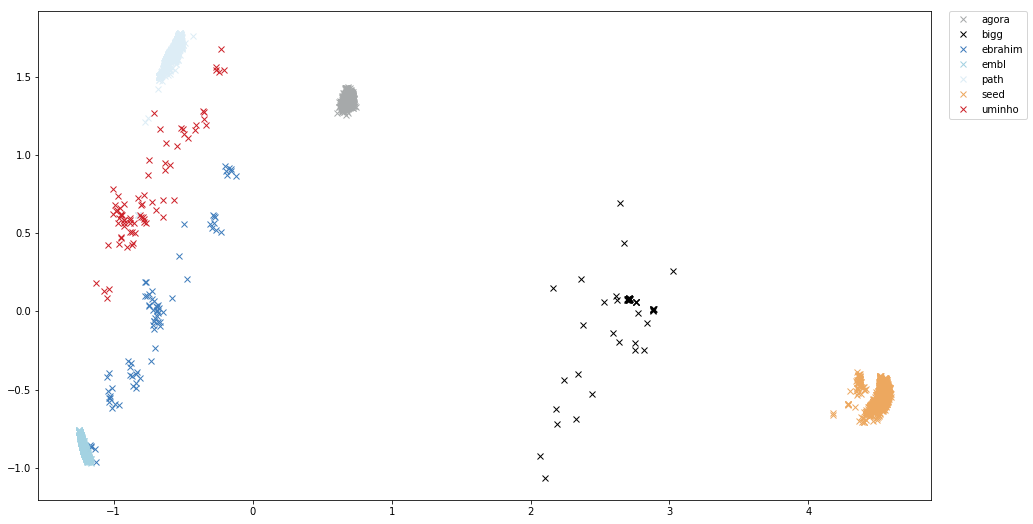

In [23]:
for label, color in zip(clean.index.get_level_values("collection").unique(), colors):
    mask = clean.index.get_level_values("collection") == label
    plt.plot(pca[mask, 0], pca[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

### t-SNE

In [24]:
%%time
tsne = TSNE(n_components=2).fit_transform(clean)

CPU times: user 1min 12s, sys: 16.5 ms, total: 1min 12s
Wall time: 1min 12s


In [25]:
x = []
y = []
lbl = []
for label in clean.index.get_level_values("collection").unique():
    mask = clean.index.get_level_values("collection") == label
    x.extend(tsne[mask, 0])
    y.extend(tsne[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("data/metric_tsne.csv", index=False)

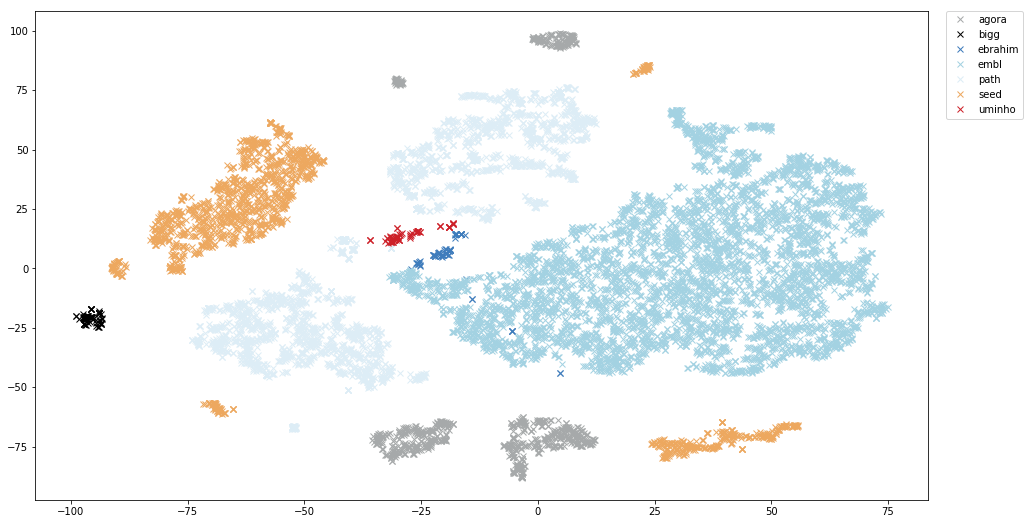

In [26]:
for label, color in zip(clean.index.get_level_values("collection").unique(), colors):
    mask = clean.index.get_level_values("collection") == label
    plt.plot(tsne[mask, 0], tsne[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

### UMAP

In [27]:
%%time
umap = UMAP(n_components=2).fit_transform(clean)

/home/moritz/.virtualenvs/memote-meta/lib/python3.6/site-packages/umap/spectral.py:229 UserWarning: Embedding a total of 8 separate connected components using meta-embedding (experimental)


CPU times: user 19.2 s, sys: 2.26 s, total: 21.5 s
Wall time: 17.9 s


In [28]:
x = []
y = []
lbl = []
for label in clean.index.get_level_values("collection").unique():
    mask = clean.index.get_level_values("collection") == label
    x.extend(umap[mask, 0])
    y.extend(umap[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("data/metric_umap.csv", index=False)

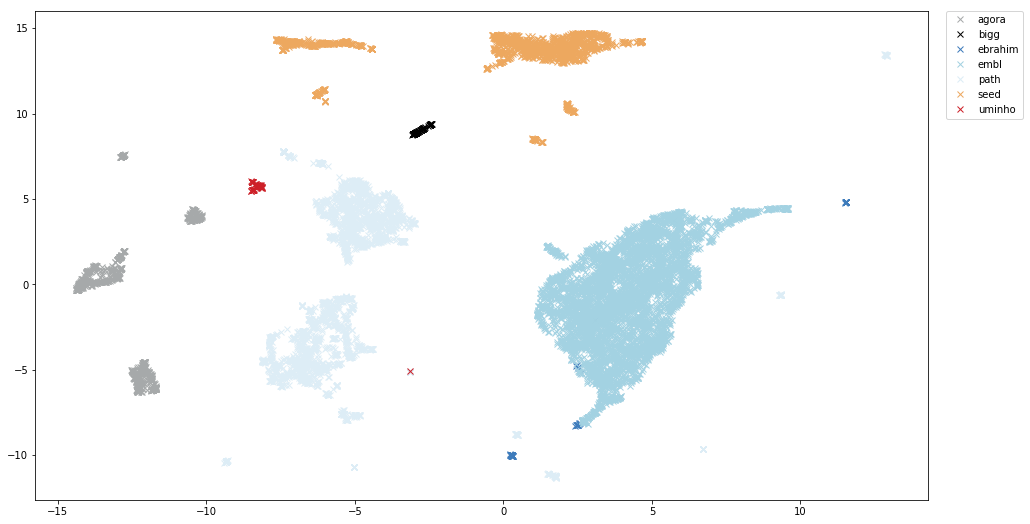

In [29]:
for label, color in zip(clean.index.get_level_values("collection").unique(), colors):
    mask = clean.index.get_level_values("collection") == label
    plt.plot(umap[mask, 0], umap[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()